In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


In [3]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [4]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [5]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [6]:
# Shape\ quantidade de linhas e colunas

dataset.shape

(506, 14)

In [7]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# Split dos dados
# Dividi os dados em treino e teste com proporção 80/20.
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

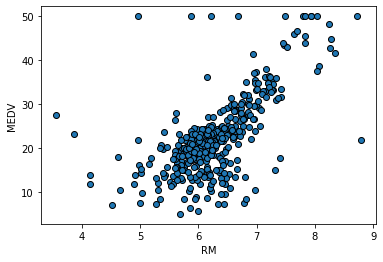

In [9]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [10]:
# Divisão
# Separa o X e Y
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

In [11]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

In [12]:
# Cria o modelo 
modelo = modelo_linear()

TREINANDO O MODELO

In [13]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [14]:
# Callback\ Retorno
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [15]:
# Lista para as previsões
predictions_list = []

In [16]:
# Caminho para salvar o checkpoint
checkpoint_path = "dados/"

In [17]:
# Cria um retorno de chamada que salva os pesos do modelo a cada n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [18]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [19]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 4s 651ms/step - loss: 787.6890 - mae: 26.5610 - mse: 787.6890 - val_loss: 887.0508 - val_mae: 27.8472 - val_mse: 887.0508
Epoch 2/4000
2/2 [==============================] - 0s 50ms/step - loss: 779.7669 - mae: 26.4155 - mse: 779.7669 - val_loss: 878.8052 - val_mae: 27.7013 - val_mse: 878.8052
Epoch 3/4000
2/2 [==============================] - 0s 30ms/step - loss: 771.9599 - mae: 26.2702 - mse: 771.9599 - val_loss: 870.6036 - val_mae: 27.5554 - val_mse: 870.6036
Epoch 4/4000
2/2 [==============================] - 0s 35ms/step - loss: 764.1423 - mae: 26.1248 - mse: 764.1423 - val_loss: 862.4503 - val_mae: 27.4096 - val_mse: 862.4503
Epoch 5/4000
2/2 [==============================] - 0s 63ms/step - loss: 756.3879 - mae: 25.9794 - mse: 756.3879 - val_loss: 854.3426 - val_mae: 27.2639 - val_mse: 854.3426
Epoch 6/4000
2/2 [==============================] - 0s 76ms/step - loss: 748.6451 - mae: 25.8341 - mse: 748.6451 - val_loss: 846.2811 

In [20]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [21]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [22]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [23]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [24]:
df.head()

,MSE em Treino,MSE em Validação
0,787.688965,887.050781
1,779.766907,878.805237
2,771.959900,870.603577
3,764.142334,862.450256
4,756.387939,854.342590


<AxesSubplot:>

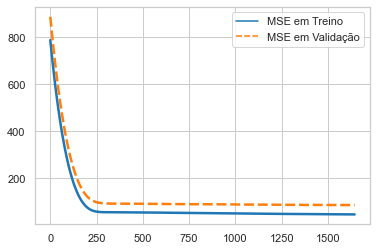

In [25]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [26]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [27]:
# Imprime as previsões
previsoes

array([21.187204, 19.086016, 23.73457 , 21.539997, 20.907045, 20.990055,
       24.25338 , 22.043243, 21.322096, 21.156076, 25.399956, 23.329895,
       21.50368 , 22.733265, 23.184631, 21.794212, 26.390888, 23.26764 ,
       28.512829, 20.393421, 20.792906, 21.275402, 19.770847, 21.187204,
       19.573698, 23.40253 , 22.85778 , 15.594412, 18.074331, 33.488235,
       21.69045 , 18.945936, 20.434927, 22.800709, 30.323483, 24.087364,
       21.960234, 27.278057, 25.316948, 30.894176, 26.909698, 29.519325,
       30.780037, 18.074331, 23.023796, 23.205383, 19.054886, 23.43885 ,
       35.19513 , 33.60756 , 18.883678, 33.08356 , 29.93956 , 25.45184 ,
       23.51667 , 22.800709, 25.633423, 27.12241 , 24.434967, 24.108116,
       23.117184, 19.651522, 23.319519, 22.805897, 21.358414, 20.621698,
       21.472551, 22.26633 , 21.825342, 21.74752 , 26.43758 , 24.533543,
       12.69944 , 15.355759, 18.001698, 23.26764 , 18.32855 , 18.733225,
       23.298767, 21.700829, 20.626886, 25.488155, 